In [1]:
import torch
import torch.nn as nn

In [2]:
from tqdm.auto import tqdm

/Users/matiasmolinolo/anaconda3/envs/iag/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
in_size = 28*28
hidden_size = 192

In [4]:
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    lambda x: (x >= 0.5).float(),
])

original_train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
original_test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

filter_digit = 1

filtered_train_dataset = [item for item in original_train_dataset if item[1] == filter_digit]
filtered_test_dataset = [item for item in original_test_dataset if item[1] == filter_digit]

filtered_dataset = filtered_train_dataset + filtered_test_dataset

data_loader = DataLoader(filtered_dataset, batch_size=64, shuffle=True, num_workers=2, multiprocessing_context='fork')

In [11]:
import matplotlib.pyplot as plt

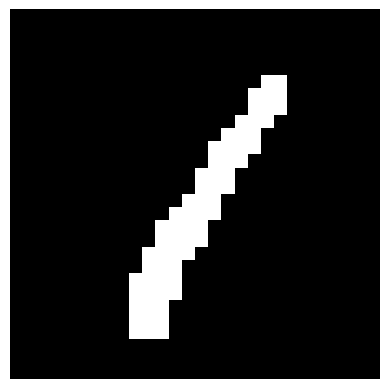

In [12]:
plt.imshow(filtered_dataset[0][0].squeeze(), cmap='gray')
plt.axis('off')
plt.show()

In [13]:
device = torch.device('cpu')

In [14]:
class NADE(nn.Module):
    def __init__(self, input_dim, hidden_size):
        super(NADE, self).__init__()
        self.input_dim = input_dim
        self.hidden_size = hidden_size

        self.W_h = nn.Parameter(torch.randn(self.hidden_size, self.input_dim)) #hidden
        self.b_h = nn.Parameter(torch.randn(self.hidden_size)) #hidden bias

        self.W_out = nn.Parameter(torch.randn(self.input_dim, self.hidden_size)) #out
        self.b_out = nn.Parameter(torch.randn(self.input_dim)) #out bias

    def forward(self, x):
        batch_size = x.shape[0]

        a = self.b_h

        probs = torch.zeros(batch_size, self.input_dim)

        for i in range(self.input_dim):
            h_d = torch.sigmoid(a).reshape(-1, self.hidden_size)
            probs[:, i] = torch.sigmoid((self.W_out[i] @ h_d.t()) + self.b_out[i]).flatten()
            a = (self.W_h[:,i].reshape(-1,1) @ x[:,i].reshape(1,-1)).reshape(-1,self.hidden_size) + a

        return probs

In [15]:
nade = NADE(in_size, hidden_size).to(device)

In [16]:
criterion = nn.BCELoss().to(device)
optimizer = optim.Adam(nade.parameters(), lr=0.001)

In [17]:
from timeit import default_timer as timer

epochs = 50
for epoch in range(epochs):
    t0 = timer()
    epoch_loss = 0
    for batch, (data, _) in enumerate(tqdm(data_loader)):
        data = data.view(-1, in_size).to(device)

        optimizer.zero_grad()
        output = nade(data)
        loss = criterion(output.to(device), data)
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()

    t1 = timer()
    print(f'Epoch: {epoch + 1}, Loss: {epoch_loss/len(data_loader)}, Time taken: {(t1 - t0):.2f} s')

100%|██████████| 124/124 [00:42<00:00,  2.93it/s]


Epoch: 1, Loss: 2.2445278018712997, Time taken: 42.27 s


100%|██████████| 124/124 [00:43<00:00,  2.86it/s]


Epoch: 2, Loss: 0.657963867629728, Time taken: 43.42 s


100%|██████████| 124/124 [00:45<00:00,  2.73it/s]


Epoch: 3, Loss: 0.48712960101904407, Time taken: 45.48 s


100%|██████████| 124/124 [00:46<00:00,  2.66it/s]


Epoch: 4, Loss: 0.43384950319605486, Time taken: 46.54 s


100%|██████████| 124/124 [00:46<00:00,  2.67it/s]


Epoch: 5, Loss: 0.3990710238295217, Time taken: 46.41 s


100%|██████████| 124/124 [00:47<00:00,  2.62it/s]


Epoch: 6, Loss: 0.36995203456571024, Time taken: 47.40 s


100%|██████████| 124/124 [00:48<00:00,  2.56it/s]


Epoch: 7, Loss: 0.3458661160642101, Time taken: 48.47 s


100%|██████████| 124/124 [00:47<00:00,  2.59it/s]


Epoch: 8, Loss: 0.32799500899930156, Time taken: 47.93 s


100%|██████████| 124/124 [00:49<00:00,  2.53it/s]


Epoch: 9, Loss: 0.31390362449230685, Time taken: 49.01 s


100%|██████████| 124/124 [00:49<00:00,  2.51it/s]


Epoch: 10, Loss: 0.3046259978605855, Time taken: 49.44 s


100%|██████████| 124/124 [00:49<00:00,  2.50it/s]


Epoch: 11, Loss: 0.29663094157172787, Time taken: 49.59 s


100%|██████████| 124/124 [00:50<00:00,  2.47it/s]


Epoch: 12, Loss: 0.2905851333372055, Time taken: 50.14 s


100%|██████████| 124/124 [00:49<00:00,  2.48it/s]


Epoch: 13, Loss: 0.28609656662710253, Time taken: 49.96 s


100%|██████████| 124/124 [00:50<00:00,  2.45it/s]


Epoch: 14, Loss: 0.28309969507878824, Time taken: 50.72 s


100%|██████████| 124/124 [00:50<00:00,  2.46it/s]


Epoch: 15, Loss: 0.2790564346698023, Time taken: 50.50 s


100%|██████████| 124/124 [00:50<00:00,  2.45it/s]


Epoch: 16, Loss: 0.2763210894359696, Time taken: 50.72 s


100%|██████████| 124/124 [00:50<00:00,  2.44it/s]


Epoch: 17, Loss: 0.2744989492479832, Time taken: 50.87 s


100%|██████████| 124/124 [00:50<00:00,  2.44it/s]


Epoch: 18, Loss: 0.2722106360860409, Time taken: 50.85 s


100%|██████████| 124/124 [00:51<00:00,  2.43it/s]


Epoch: 19, Loss: 0.2702146274668555, Time taken: 51.10 s


100%|██████████| 124/124 [00:50<00:00,  2.44it/s]


Epoch: 20, Loss: 0.26824896325988157, Time taken: 50.85 s


100%|██████████| 124/124 [00:51<00:00,  2.43it/s]


Epoch: 21, Loss: 0.26719454303383827, Time taken: 51.07 s


100%|██████████| 124/124 [00:50<00:00,  2.43it/s]


Epoch: 22, Loss: 0.2658888240975718, Time taken: 50.94 s


100%|██████████| 124/124 [00:50<00:00,  2.43it/s]


Epoch: 23, Loss: 0.2643269259602793, Time taken: 51.00 s


100%|██████████| 124/124 [00:50<00:00,  2.44it/s]


Epoch: 24, Loss: 0.26383979510395755, Time taken: 50.88 s


100%|██████████| 124/124 [00:50<00:00,  2.43it/s]


Epoch: 25, Loss: 0.26260323606191144, Time taken: 50.99 s


100%|██████████| 124/124 [00:50<00:00,  2.44it/s]


Epoch: 26, Loss: 0.2615976340828403, Time taken: 50.79 s


100%|██████████| 124/124 [00:50<00:00,  2.44it/s]


Epoch: 27, Loss: 0.261114587106051, Time taken: 50.91 s


100%|██████████| 124/124 [00:50<00:00,  2.47it/s]


Epoch: 28, Loss: 0.2604732392055373, Time taken: 50.13 s


100%|██████████| 124/124 [00:50<00:00,  2.44it/s]


Epoch: 29, Loss: 0.2604003184505047, Time taken: 50.91 s


100%|██████████| 124/124 [00:50<00:00,  2.44it/s]


Epoch: 30, Loss: 0.25897133085996876, Time taken: 50.89 s


100%|██████████| 124/124 [00:50<00:00,  2.44it/s]


Epoch: 31, Loss: 0.25873592195491635, Time taken: 50.74 s


100%|██████████| 124/124 [00:50<00:00,  2.48it/s]


Epoch: 32, Loss: 0.25822511759977185, Time taken: 50.10 s


100%|██████████| 124/124 [00:50<00:00,  2.43it/s]


Epoch: 33, Loss: 0.25728991519539585, Time taken: 50.97 s


100%|██████████| 124/124 [00:51<00:00,  2.43it/s]


Epoch: 34, Loss: 0.2573354349982354, Time taken: 51.08 s


100%|██████████| 124/124 [00:53<00:00,  2.32it/s]


Epoch: 35, Loss: 0.2573376227050058, Time taken: 53.44 s


100%|██████████| 124/124 [00:50<00:00,  2.44it/s]


Epoch: 36, Loss: 0.25672081533458924, Time taken: 50.93 s


100%|██████████| 124/124 [00:50<00:00,  2.48it/s]


Epoch: 37, Loss: 0.2563583061339394, Time taken: 50.11 s


100%|██████████| 124/124 [00:50<00:00,  2.44it/s]


Epoch: 38, Loss: 0.25588603978676183, Time taken: 50.91 s


100%|██████████| 124/124 [00:50<00:00,  2.45it/s]


Epoch: 39, Loss: 0.2557134952756666, Time taken: 50.54 s


100%|██████████| 124/124 [00:49<00:00,  2.48it/s]


Epoch: 40, Loss: 0.2550739945182877, Time taken: 49.98 s


100%|██████████| 124/124 [00:50<00:00,  2.43it/s]


Epoch: 41, Loss: 0.2553497114248814, Time taken: 50.96 s


100%|██████████| 124/124 [00:50<00:00,  2.46it/s]


Epoch: 42, Loss: 0.2546590189299276, Time taken: 50.47 s


100%|██████████| 124/124 [00:51<00:00,  2.41it/s]


Epoch: 43, Loss: 0.2545268109008189, Time taken: 51.42 s


100%|██████████| 124/124 [00:51<00:00,  2.39it/s]


Epoch: 44, Loss: 0.2545596259015222, Time taken: 51.89 s


100%|██████████| 124/124 [00:49<00:00,  2.48it/s]


Epoch: 45, Loss: 0.2542661632741651, Time taken: 49.95 s


100%|██████████| 124/124 [00:50<00:00,  2.46it/s]


Epoch: 46, Loss: 0.25400203202039967, Time taken: 50.45 s


100%|██████████| 124/124 [00:48<00:00,  2.54it/s]


Epoch: 47, Loss: 0.2540172635307235, Time taken: 48.79 s


100%|██████████| 124/124 [00:49<00:00,  2.53it/s]


Epoch: 48, Loss: 0.2537886255210446, Time taken: 49.02 s


100%|██████████| 124/124 [00:48<00:00,  2.56it/s]


Epoch: 49, Loss: 0.2534306062565696, Time taken: 48.43 s


100%|██████████| 124/124 [00:48<00:00,  2.55it/s]

Epoch: 50, Loss: 0.25341124147657423, Time taken: 48.62 s


In [18]:
def sample(model, input_dim, device):
  with torch.no_grad():
    preds = torch.zeros(1, input_dim).to(device)
    for i in tqdm(range(input_dim)):
        p = model.forward(preds)
        preds[0][i] = torch.bernoulli(p[0][i])

    return torch.reshape(preds.cpu(), (28, 28))

In [19]:
torch.save(nade, 'nade.pt')

In [20]:
img = sample(nade, in_size, device)

100%|██████████| 784/784 [00:40<00:00, 19.33it/s]


In [21]:
def show_sample(img):
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()

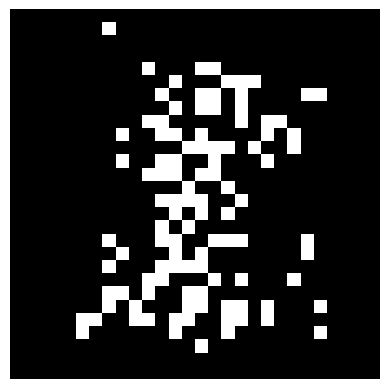

In [22]:
show_sample(img)